In [ ]:
from sage.all import sigma, nth_prime
import pickle

def nieburTau(n):
    def step1(n, k):
        return 35*k^4 - 52*k^3*n + 18*k^2*n^2
    def step2(n, k):
        return sigma(k) * sigma(n - k)
    def step3(n):
        ans = 0
        for k in range(1, n):
            ans += step1(n, k) * step2(n, k)
        return 24*ans
    return n^4 * sigma(n) - step3(n)

def primeTau(n):
    return nieburTau(nth_prime(n))   # ✅ works in Sage 10.6

prime_tau_lst = [(0,1)]
for k in range(1, 1001):
    prime_tau_lst.append([k, primeTau(k)])
    print(k)

with open('/Users/barrybrent/data/run27aug25no2.txt', 'wb') as wfile:
    pickle.dump(prime_tau_lst, wfile) #output snipped

In [ ]:
import pickle
with open('/Users/barrybrent/data/run27aug25no2.txt', 'rb') as rfile:
    h_list = pickle.load(rfile)
def h(n):
    return h_list[n][1]
j0=1
j_lst=[(0,j0)]
for n in [1..1000]:
    sm=0
    for r in [1..n-1]:
        sm=sm+j_lst[r][1]*h(n-r)
    jn=n*h(n)-sm
    j_lst+=[(n,jn)]
    print(n)

with open('/Users/barrybrent/data/run1sept25no1.txt', 'wb') as wfile:
    pickle.dump(j_lst, wfile) #output snipped

In [13]:
import pickle
Rx.<x>=PolynomialRing(QQ)
with open('/Users/barrybrent/data/run1sept25no1.txt', 'rb') as rfile:
    j_list=pickle.load(rfile)
j_values=[pair[1] for pair in j_list]
def J_matrix(j_values):
    n = len(j_values)
    J = matrix(SR, n, n, 0)  # symbolic ring matrix

    for i in range(n):
        for j in range(n):
            # Construct matrix J
            if j == 0:
                J[i,j] = j_values[i]
            elif j == i + 1:
                J[i,j] = -(i + 1)  # superdiagonal: -1, -2, ...
            elif 1 <= j <= i:
                J[i,j] = j_values[i - j]
            else:
                J[i,j] = 0

    return J
for n in [1..3]:
    jl=j_values[:n]
    J = J_matrix(jl)
    print("J:")
    show(J)
    print("|J|:", J.det())
    cp=J.charpoly()
    print("characteristic polynomial:",cp)

J:


[1]

|J|: 1
characteristic polynomial: x - 1
J:


[  1  -1]
[-24   1]

|J|: -23
characteristic polynomial: x^2 - 2*x - 23
J:


[  1  -1   0]
[-24   1  -2]
[-72 -24   1]

|J|: -215
characteristic polynomial: x^3 - 3*x^2 - 69*x + 215


In [ ]:
import pickle
Rx.<x>=PolynomialRing(QQ)
with open('/Users/barrybrent/data/run1sept25no1.txt', 'rb') as rfile:
    j_list=pickle.load(rfile)
j_values=[pair[1] for pair in j_list]
def J_matrix(j_values):
    n = len(j_values)
    J = matrix(QQ, n, n, 0)  # symbolic ring matrix

    for i in range(n):
        for j in range(n):
            # Construct matrix J
            if j == 0:
                J[i,j] = j_values[i]
            elif j == i + 1:
                J[i,j] = -(i + 1)  # superdiagonal: -1, -2, ...
            elif 1 <= j <= i:
                J[i,j] = j_values[i - j]
            else:
                J[i,j] = 0

    return J
cp_list=[]
for n in [1..300]:
    jl=j_values[:n]
    J = J_matrix(jl)
    J.charpoly(algorithm="linbox") # this linbox method is fast & efficient
    cp_list+=[(n,cp)]
    print(n)
with open('/Users/barrybrent/data/run1sept25no2.txt', 'wb') as wfile:
    pickle.dump(cp_lst, wfile) #output snipped; & interrupted the run

n=1, min modulus=1.0000000000000000000000000000, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n1_20250902_000234.png
n=2, min modulus=3.8989794855663561963945681494, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n2_20250902_000234.png
n=3, min modulus=3.1352024958736643267599379628, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n3_20250902_000234.png
n=4, min modulus=17.347901601657556906456059121, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n4_20250902_000235.png
n=5, min modulus=20.235851427676632721820073224, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n5_20250902_000235.png
n=6, min modulus=25.624123050813371192538438077, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n6_20250902_000235.png
n=7, min modulus=3.2953242703736794111062212606, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n7_20250902_000235.png
n=8, min modulus=17.974661193452444115535589103, saved /Users/

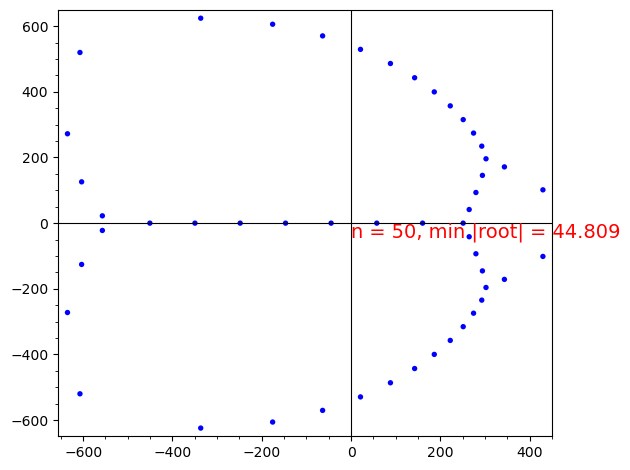

n=50, min modulus=44.809235273332606035498712190, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n50_20250902_000247.png
n=51, min modulus=32.569857558481287191369963885, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n51_20250902_000247.png
n=52, min modulus=7.6582800642340744263734328935, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n52_20250902_000248.png
n=53, min modulus=17.257066691715201922101204680, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n53_20250902_000248.png
n=54, min modulus=42.176377696545304813672023205, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n54_20250902_000248.png
n=55, min modulus=35.335792242937395982987332907, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n55_20250902_000249.png
n=56, min modulus=10.387817184546625218226870661, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n56_20250902_000250.png
n=57, min modulus=14.563401518518999465371188481

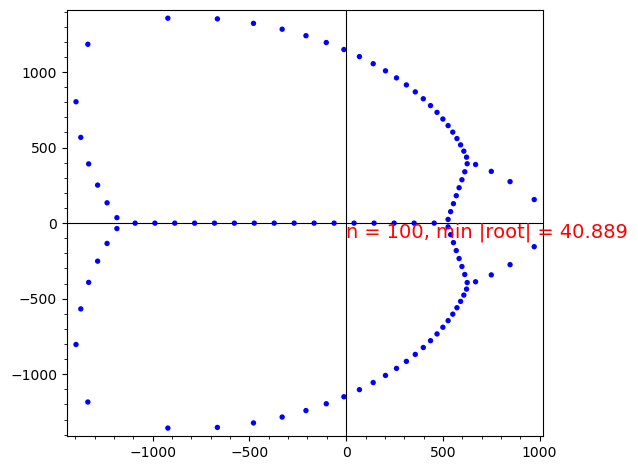

n=100, min modulus=40.888810417132173326453855161, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n100_20250902_000352.png
n=101, min modulus=15.733440405916554071428802924, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n101_20250902_000355.png
n=102, min modulus=9.4229614229076179830920831023, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n102_20250902_000358.png
n=103, min modulus=34.580419751751283719015683090, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n103_20250902_000401.png
n=104, min modulus=43.686036828750749055442899166, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n104_20250902_000404.png
n=105, min modulus=18.520718342753704985688592208, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n105_20250902_000407.png
n=106, min modulus=6.6455526817808700388358788300, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n106_20250902_000411.png
n=107, min modulus=31.812798137681

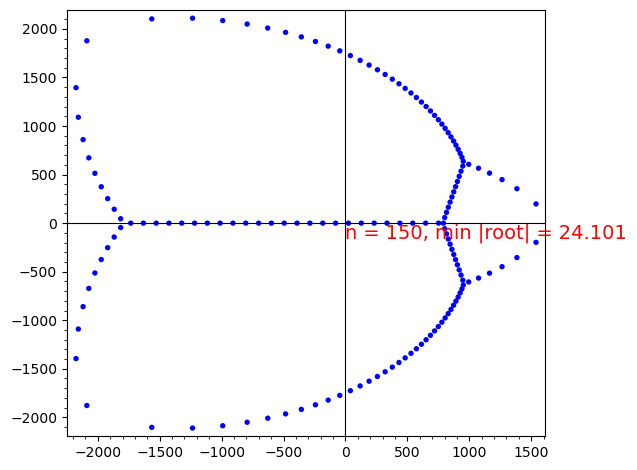

n=150, min modulus=24.100857581693029588897750812, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n150_20250902_000924.png
n=151, min modulus=1.1392095341942079570930846274, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n151_20250902_000937.png
n=152, min modulus=26.379756660771249668972828180, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n152_20250902_000949.png
n=153, min modulus=51.620791002585642223729328303, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n153_20250902_001003.png
n=154, min modulus=26.908346510523920497938386321, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n154_20250902_001016.png
n=155, min modulus=1.6637453972118456975846861792, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n155_20250902_001030.png
n=156, min modulus=23.581310117012417987521589688, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n156_20250902_001043.png
n=157, min modulus=48.826826682515

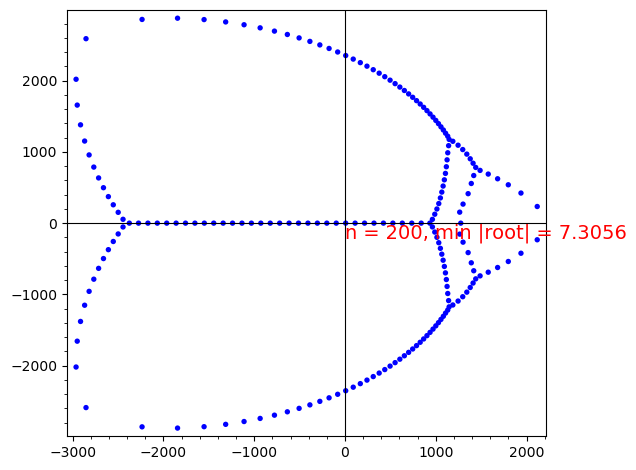

n=200, min modulus=7.3056031171762851801152634433, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n200_20250902_002807.png
n=201, min modulus=17.977219638826980053925141491, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n201_20250902_002844.png
n=202, min modulus=43.260318475095312150435756603, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n202_20250902_002923.png
n=203, min modulus=35.405924207154115446540847246, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n203_20250902_003003.png
n=204, min modulus=10.120780924427609610068487417, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n204_20250902_003041.png
n=205, min modulus=15.164624288265502003017973314, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n205_20250902_003120.png
n=206, min modulus=40.450294309434556579004555683, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n206_20250902_003201.png
n=207, min modulus=38.224536904064

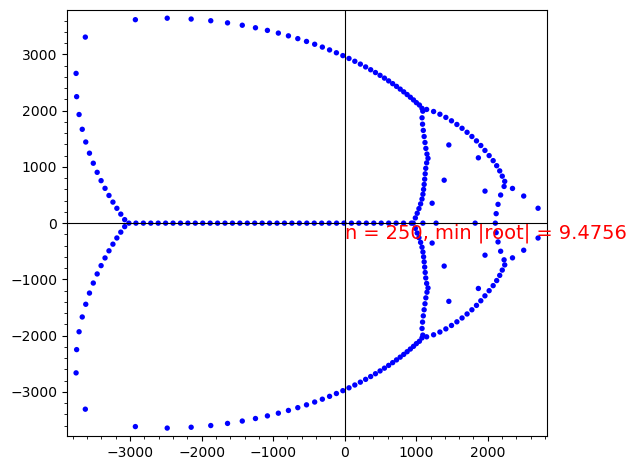

n=250, min modulus=9.4756122927860405524519237771, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n250_20250902_011917.png
n=251, min modulus=34.784216657473839888423856051, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n251_20250902_012055.png
n=252, min modulus=43.965060990786831457347606435, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n252_20250902_012228.png
n=253, min modulus=18.655133214534082275749297933, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n253_20250902_012405.png
n=254, min modulus=6.6549646979207705226640861660, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n254_20250902_012543.png
n=255, min modulus=31.965234243401965217618717308, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n255_20250902_012727.png
n=256, min modulus=46.789601460767575748423145417, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n256_20250902_012905.png
n=257, min modulus=21.478049876566

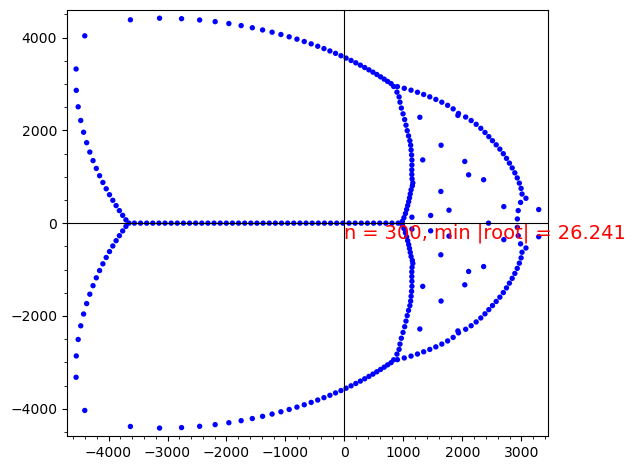

n=300, min modulus=26.241362461993153078556664858, saved /Users/barrybrent/data/root_plots_20250902_000234/roots_n300_20250902_031529.png


RuntimeError: error in line(): option 'size' not valid

In [19]:
import pickle
Rx.<x>=PolynomialRing(QQ)
with open('/Users/barrybrent/data/run1sept25no1.txt', 'rb') as rfile:
    j_list=pickle.load(rfile)
j_values=[pair[1] for pair in j_list]

import pickle
from sage.all import matrix, QQ, list_plot, ComplexField, text, Graphics
from datetime import datetime
from pathlib import Path
import sys

# -------------------------
# Function: build J over QQ
# -------------------------
def J_matrix_QQ(j_values):
    n = len(j_values)
    J = matrix(QQ, n, n, 0)
    for i in range(n):
        for j in range(n):
            if j == 0:
                J[i,j] = QQ(j_values[i])
            elif j == i + 1:
                J[i,j] = - (i + 1)
            elif 1 <= j <= i:
                J[i,j] = QQ(j_values[i - j])
            else:
                J[i,j] = 0
    return J

# -----------------------------------
# Function: scatter plot roots of poly
# -----------------------------------
def plot_roots(cp, n=None, min_mod=None, precision=53, size=20):
    """
    Scatter plot the zeros of an exact rational polynomial.
    Optional: display n and min modulus as title
    """
    CF = ComplexField(precision)
    roots = [CF(r) for r in cp.roots(CF, multiplicities=False)]
    points = [(z.real(), z.imag()) for z in roots]
    
    p = list_plot(points, plotjoined=False, marker='o', size=size)
    p.axes_labels(['Re', 'Im'])
    
    # Add title text if available
    title_text = ""
    if n is not None:
        title_text += f"n = {n}"
    if min_mod is not None:
        title_text += f", min |root| = {min_mod:.5g}"
    if title_text:
        p += text(title_text, (0.05, 0.95), fontsize=14, color='red',
                  horizontal_alignment='left', vertical_alignment='top', frame=True)
    return p

# ------------------------------------------------------
# Function: compute minimum modulus of polynomial roots
# ------------------------------------------------------
def min_modulus(cp, precision=53):
    CF = ComplexField(precision)
    roots = [CF(r) for r in cp.roots(CF, multiplicities=False)]
    if roots:
        return min([abs(r) for r in roots])
    else:
        return None

# -------------------------
# Paths and timestamped folder
# -------------------------
base_dir = Path('/Users/barrybrent/data')
timestamp_folder = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_dir = base_dir / f'root_plots_{timestamp_folder}'
plot_dir.mkdir(parents=True, exist_ok=True)

# -------------------------
# Load j_values from pickle
# -------------------------
with open(base_dir / 'run1sept25no1.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
j_values = [pair[1] for pair in j_list]

cp_list = []
min_mod_list = []
displayed_plots = []  # collect plots for n % 50 == 0 to make PDF

# -------------------------
# Main loop: n = 1..300
# -------------------------
for n in range(1, 301):
    jl = j_values[:n]
    J = J_matrix_QQ(jl)
    
    # Characteristic polynomial over QQ using LinBox
    cp = J.charpoly(algorithm='linbox')
    cp_list.append((n, cp))
    
    # Minimum modulus
    min_mod = min_modulus(cp, precision=100)
    min_mod_list.append((n, float(min_mod)))
    
    # Scatter plot
    p = plot_roots(cp, n=n, min_mod=min_mod, precision=100, size=15)
    
    # Timestamped filename within the new subfolder
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plot_filename = plot_dir / f'roots_n{n}_{timestamp}.png'
    p.save(plot_filename)
    
    # Display only n divisible by 50, suppress verbose output
    if n % 50 == 0:
        old_stdout = sys.stdout
        sys.stdout = open('/dev/null','w')  # suppress verbose warnings
        p.show()
        sys.stdout.close()
        sys.stdout = old_stdout
        displayed_plots.append(p)  # save for PDF
    
    print(f'n={n}, min modulus={min_mod}, saved {plot_filename}')

# -------------------------
# Save all characteristic polynomials
# -------------------------
with open(base_dir / 'run1sept25no2.txt', 'wb') as wfile:
    pickle.dump(cp_list, wfile)

# -------------------------
# Save minimum moduli list
# -------------------------
with open(base_dir / 'min_modulus.txt', 'wb') as wfile:
    pickle.dump(min_mod_list, wfile)

# -------------------------
# Create a single min modulus plot
# -------------------------
n_values = [item[0] for item in min_mod_list]
mods = [item[1] for item in min_mod_list]
p_min = list_plot(list(zip(n_values, mods)), plotjoined=True, marker='o', size=5)
p_min.axes_labels(['n', 'min modulus'])
p_min_title = "Minimum root modulus vs n"
p_min += text(p_min_title, (0.05, 0.95), fontsize=14, color='blue',
              horizontal_alignment='left', vertical_alignment='top', frame=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
p_min_file = plot_dir / f'min_modulus_plot_{timestamp}.png'
p_min.save(p_min_file)
p_min.show()

# -------------------------
# Optional: save displayed plots as single PDF
# -------------------------
if displayed_plots:
    pdf_file = plot_dir / f'displayed_root_plots_{timestamp}.pdf'
    g = Graphics()
    for plot in displayed_plots:
        g += plot
    g.save(pdf_file)
    print(f"Displayed plots saved as PDF: {pdf_file}")


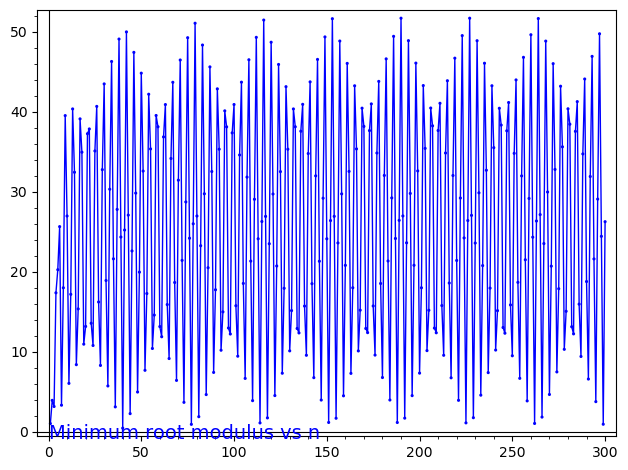

Minimum modulus plot saved as /Users/barrybrent/data/min_modulus_plot_20250902_032129.png


In [20]:
# It seems that no data was lost in the error above, but because of it
# we need another block of code to generate the plot of the minimum moduli.
import pickle
from sage.all import list_plot, text
from pathlib import Path
from datetime import datetime

# -------------------------
# Paths
# -------------------------
base_dir = Path('/Users/barrybrent/data')
plot_dir = base_dir  # or choose a subfolder if you want
min_mod_file = base_dir / 'min_modulus.txt'

# -------------------------
# Reload saved min modulus data
# -------------------------
with open(min_mod_file, 'rb') as rfile:
    min_mod_list = pickle.load(rfile)

# Separate into x- and y-values
n_values = [item[0] for item in min_mod_list]
mods = [item[1] for item in min_mod_list]

# -------------------------
# Make the plot (line + points)
# -------------------------
points = list(zip(n_values, mods))
p_line = list_plot(points, plotjoined=True)                     # line
p_points = list_plot(points, plotjoined=False, marker='o', size=5)  # points
p_min = p_line + p_points

p_min.axes_labels(['n', 'min modulus'])
p_min += text("Minimum root modulus vs n", (0.05, 0.95),
              fontsize=14, color='blue',
              horizontal_alignment='left', vertical_alignment='top',
              frame=True)

# -------------------------
# Save and show
# -------------------------
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
p_min_file = plot_dir / f'min_modulus_plot_{timestamp}.png'
p_min.save(p_min_file)
p_min.show()

print(f"Minimum modulus plot saved as {p_min_file}")


n=1, min modulus=24.000000000000000000000000000, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n1_20250902_032221.png
n=2, min modulus=15.514718625761429707189867655, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n2_20250902_032222.png
n=3, min modulus=9.7694737359230702236439624400, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n3_20250902_032222.png
n=4, min modulus=5.3114071932577303640684950940, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n4_20250902_032222.png
n=5, min modulus=1.6139147917042145597491848500, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n5_20250902_032222.png
n=6, min modulus=1.5879051454191077368785308340, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n6_20250902_032222.png
n=7, min modulus=4.4522474478189931005410114121, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n7_20250902_032222.png
n=8, min modulus=1.6543137021601516920520568638, saved /Users/

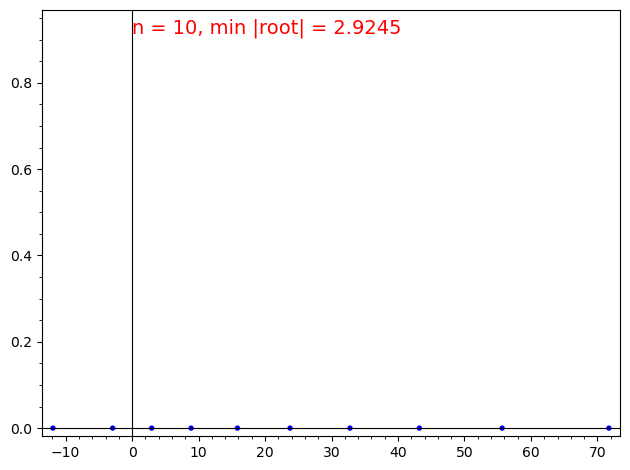

n=10, min modulus=2.9244719574439480872784899556, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n10_20250902_032223.png
n=11, min modulus=0.77264894557935191150828404348, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n11_20250902_032223.png
n=12, min modulus=0.91893426245425489515018209996, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n12_20250902_032223.png
n=13, min modulus=0.60986378010641909423371302247, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n13_20250902_032223.png
n=14, min modulus=2.1236284155283722912445765689, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n14_20250902_032223.png
n=15, min modulus=1.0808577624779005937470621166, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n15_20250902_032224.png
n=16, min modulus=2.6864181382181550116925193279, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n16_20250902_032224.png
n=17, min modulus=0.4089624855388881013186850

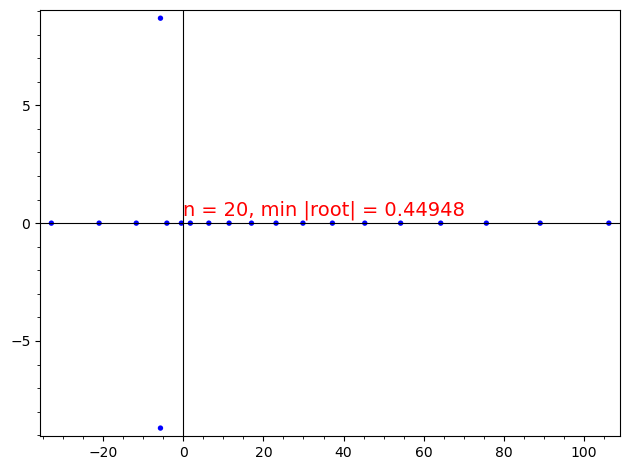

n=20, min modulus=0.44947820838730428992836821069, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n20_20250902_032224.png
n=21, min modulus=1.4537922647476792879556431576, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n21_20250902_032225.png
n=22, min modulus=1.1549351855455311356247767071, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n22_20250902_032225.png
n=23, min modulus=0.88584669959092697738906363626, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n23_20250902_032225.png
n=24, min modulus=0.91518699689842778629835001813, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n24_20250902_032225.png
n=25, min modulus=0.96392946860512999258684585911, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n25_20250902_032225.png
n=26, min modulus=2.0801097728610834996760603881, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n26_20250902_032226.png
n=27, min modulus=0.345427295723557286382794

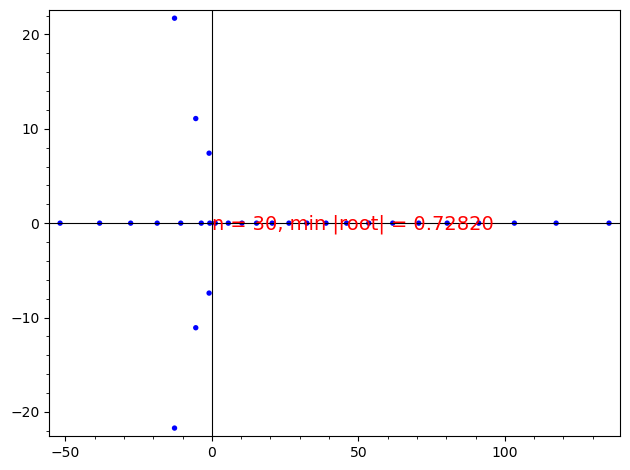

n=30, min modulus=0.72819852857392654617190466805, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n30_20250902_032227.png
n=31, min modulus=1.8179207179462111744339906672, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n31_20250902_032227.png
n=32, min modulus=0.62978326495153840550924769730, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n32_20250902_032227.png
n=33, min modulus=0.79531359153143841301657646828, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n33_20250902_032227.png
n=34, min modulus=0.42918685818601191859593747027, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n34_20250902_032228.png
n=35, min modulus=1.2321835833027722393903276239, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n35_20250902_032228.png
n=36, min modulus=1.1249138399663801586914189734, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n36_20250902_032228.png
n=37, min modulus=0.927479161450833901472692

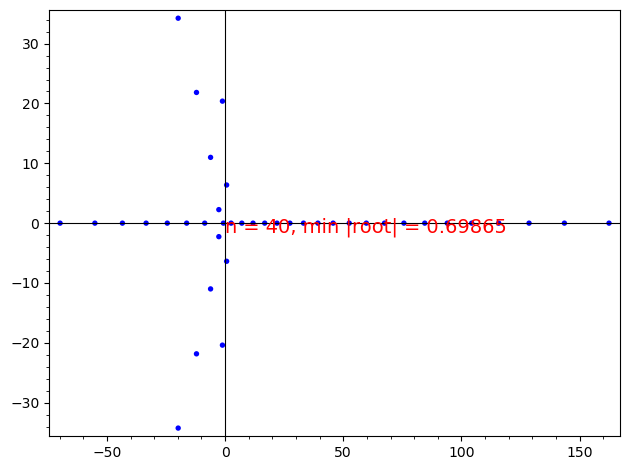

n=40, min modulus=0.69864757017782365890360769760, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n40_20250902_032229.png
n=41, min modulus=0.50707324549630407446222602038, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n41_20250902_032230.png
n=42, min modulus=0.13827376999024651521606166246, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n42_20250902_032230.png
n=43, min modulus=2.0008625529301028656962744900, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n43_20250902_032230.png
n=44, min modulus=0.70723792744631801815338525666, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n44_20250902_032231.png
n=45, min modulus=1.0769852215415705763538989595, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n45_20250902_032231.png
n=46, min modulus=1.8945925398094634704987319250, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n46_20250902_032232.png
n=47, min modulus=0.091889056810713872029161

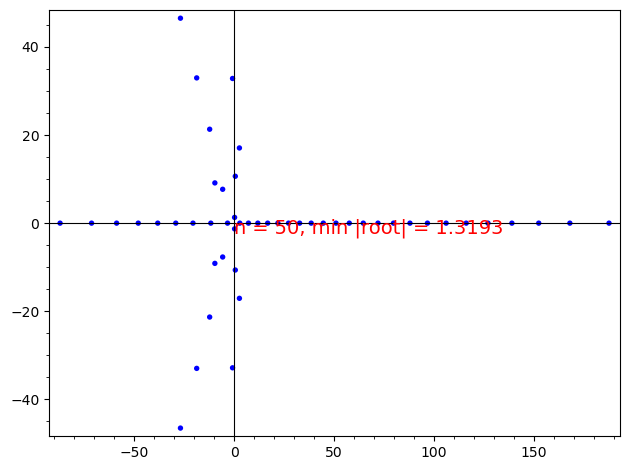

n=50, min modulus=1.3193213335529361696630383335, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n50_20250902_032233.png
n=51, min modulus=0.51391892109567639929631963079, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n51_20250902_032234.png
n=52, min modulus=1.5019837145709713962152095694, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n52_20250902_032235.png
n=53, min modulus=1.1859730378935740916816343415, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n53_20250902_032235.png
n=54, min modulus=0.95125343603792039363887499608, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n54_20250902_032236.png
n=55, min modulus=0.48011836737689952071738720665, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n55_20250902_032236.png
n=56, min modulus=1.2839849597429238803516372366, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n56_20250902_032237.png
n=57, min modulus=1.2035133058569533643958560

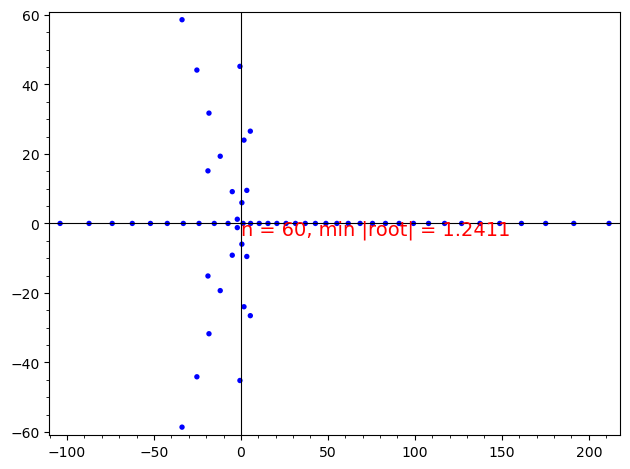

n=60, min modulus=1.2410773860389939891243474581, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n60_20250902_032240.png
n=61, min modulus=0.17888153077722534544547049873, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n61_20250902_032240.png
n=62, min modulus=0.72066488434248338483514302025, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n62_20250902_032241.png
n=63, min modulus=1.0535627111804717044712718959, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n63_20250902_032242.png
n=64, min modulus=0.76105029246183504153074889293, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n64_20250902_032243.png
n=65, min modulus=0.86823261717393636510939240324, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n65_20250902_032244.png
n=66, min modulus=2.4401168627656219051667332483, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n66_20250902_032245.png
n=67, min modulus=0.611765665405570037513149

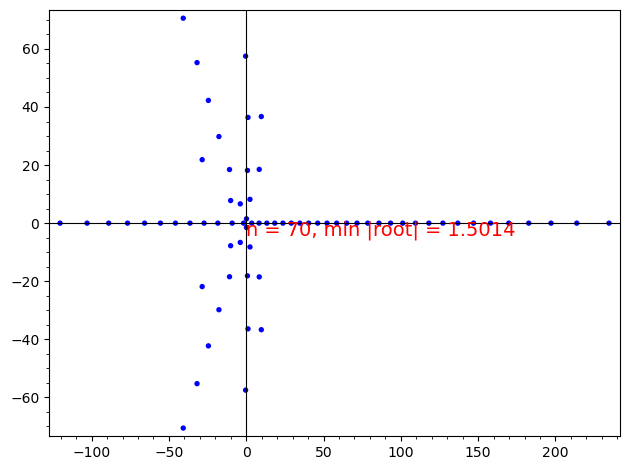

n=70, min modulus=1.5014040746144245891948527255, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n70_20250902_032249.png
n=71, min modulus=0.84520256686308066018362192676, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n71_20250902_032251.png
n=72, min modulus=0.16683674175131071480918544499, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n72_20250902_032252.png
n=73, min modulus=0.74163309084614213449135215393, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n73_20250902_032253.png
n=74, min modulus=1.7329712379490718589486629461, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n74_20250902_032255.png
n=75, min modulus=1.9237430823913488795619346472, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n75_20250902_032255.png
n=76, min modulus=0.67702017155871109337736443949, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n76_20250902_032256.png
n=77, min modulus=0.305371080802165424143219

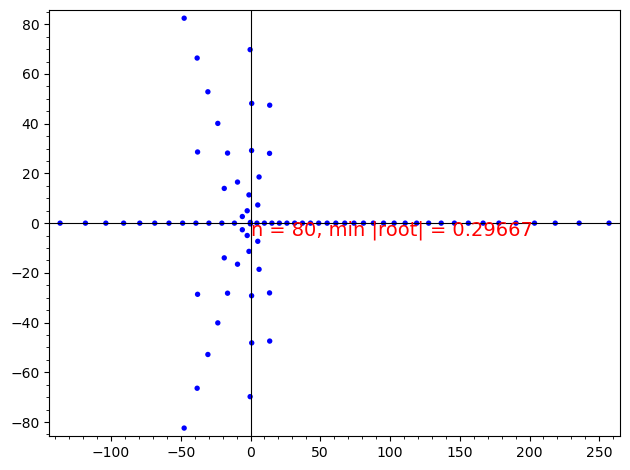

n=80, min modulus=0.29667173530476600387395320113, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n80_20250902_032301.png
n=81, min modulus=0.86615646336393262852105991296, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n81_20250902_032303.png
n=82, min modulus=1.8538900423964962546768511820, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n82_20250902_032304.png
n=83, min modulus=0.20645604836874934381421430555, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n83_20250902_032306.png
n=84, min modulus=1.4678498504292058334304805762, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n84_20250902_032308.png
n=85, min modulus=0.012336149084990135271189706132, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n85_20250902_032311.png
n=86, min modulus=1.2673824121218969234376851465, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n86_20250902_032313.png
n=87, min modulus=1.56493695829196432787531

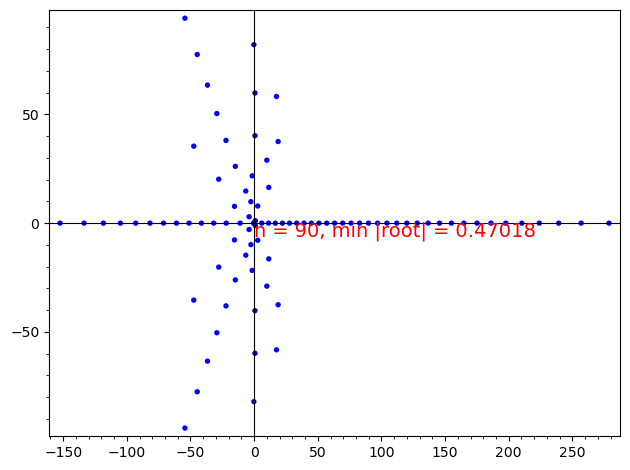

n=90, min modulus=0.47018149520895946515818437489, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n90_20250902_032321.png
n=91, min modulus=1.5209595332136809545208293701, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n91_20250902_032323.png
n=92, min modulus=0.45789896659455685520816768924, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n92_20250902_032325.png
n=93, min modulus=1.8818873509067309327282564348, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n93_20250902_032327.png
n=94, min modulus=0.72030018224392651977291680565, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n94_20250902_032330.png
n=95, min modulus=1.1591105917987876211713514026, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n95_20250902_032333.png
n=96, min modulus=1.7629615696812979992700799954, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n96_20250902_032336.png
n=97, min modulus=0.4602169721192631213060222

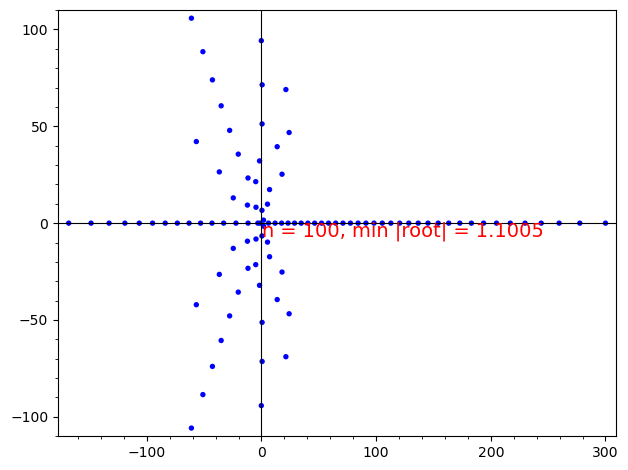

n=100, min modulus=1.1005140816987987005671886086, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n100_20250902_032347.png
n=101, min modulus=0.64012513264251177684696900314, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n101_20250902_032350.png
n=102, min modulus=1.7944180158579177992179308337, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n102_20250902_032353.png
n=103, min modulus=0.21258003267601078248626859355, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n103_20250902_032356.png
n=104, min modulus=0.41949067924213808400251800627, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n104_20250902_032358.png
n=105, min modulus=0.69730441485591274127539907262, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n105_20250902_032401.png
n=106, min modulus=1.4134382087999881433542732293, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n106_20250902_032405.png
n=107, min modulus=1.672168421

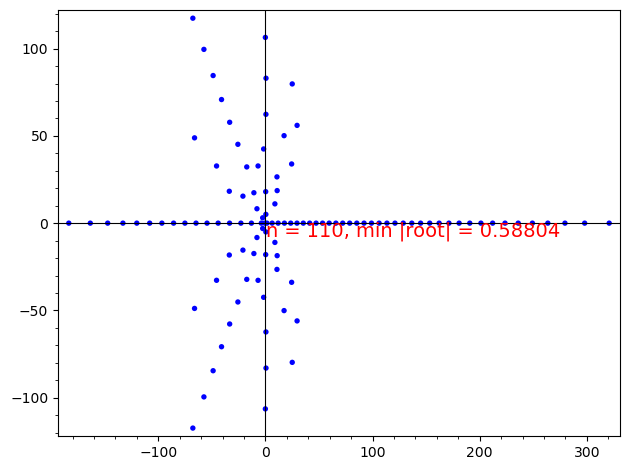

n=110, min modulus=0.58804264524891966041064029413, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n110_20250902_032420.png
n=111, min modulus=0.63126622499249235760590534823, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n111_20250902_032425.png
n=112, min modulus=1.5706206007212219558762250242, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n112_20250902_032430.png
n=113, min modulus=0.78701251037301061608173946748, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n113_20250902_032434.png
n=114, min modulus=0.86076377347129110523468450137, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n114_20250902_032438.png
n=115, min modulus=1.7301027526921791212244400631, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n115_20250902_032443.png
n=116, min modulus=0.37792136820617415064646499067, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n116_20250902_032448.png
n=117, min modulus=0.81183485

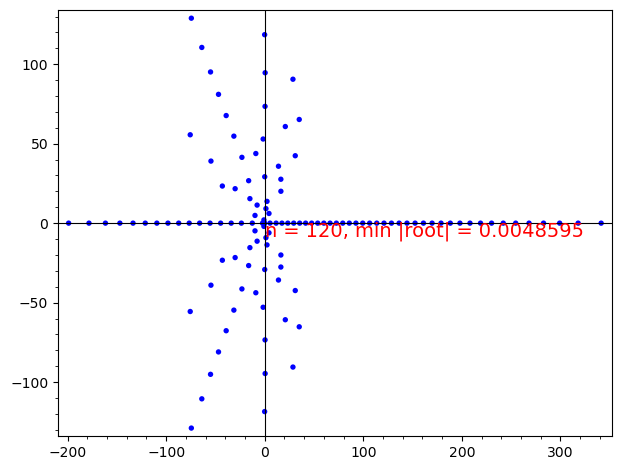

n=120, min modulus=0.0048595146413309243699950923011, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n120_20250902_032507.png
n=121, min modulus=1.3729280600473347128313176854, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n121_20250902_032513.png
n=122, min modulus=0.47831821425392429991198673901, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n122_20250902_032519.png
n=123, min modulus=0.60920656941816405841651033577, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n123_20250902_032524.png
n=124, min modulus=2.3643026212014071991195338804, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n124_20250902_032530.png
n=125, min modulus=0.12557666648092265993261785600, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n125_20250902_032534.png
n=126, min modulus=1.1779484081183174712351780550, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n126_20250902_032541.png
n=127, min modulus=0.9922525

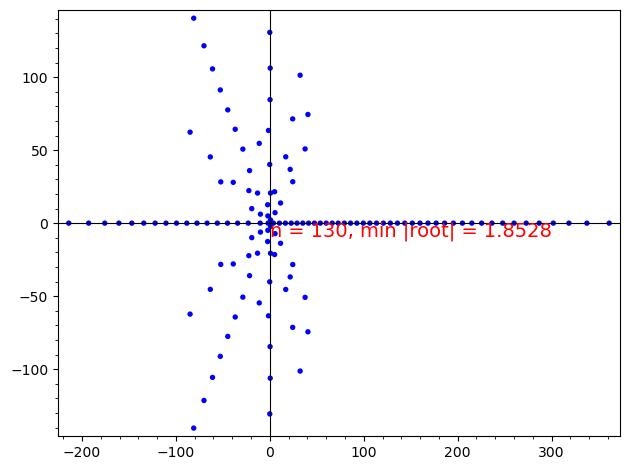

n=130, min modulus=1.8528226531419251682618995316, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n130_20250902_032611.png
n=131, min modulus=0.30880189224424382301252935424, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n131_20250902_032620.png
n=132, min modulus=0.50379281655083719042517300633, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n132_20250902_032628.png
n=133, min modulus=1.4688556120353770313944135504, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n133_20250902_032634.png
n=134, min modulus=1.3768522033049056959927488958, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n134_20250902_032640.png
n=135, min modulus=1.0358997123763987995382906547, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n135_20250902_032651.png
n=136, min modulus=0.69237166710567991406912175146, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n136_20250902_032658.png
n=137, min modulus=0.7487970620

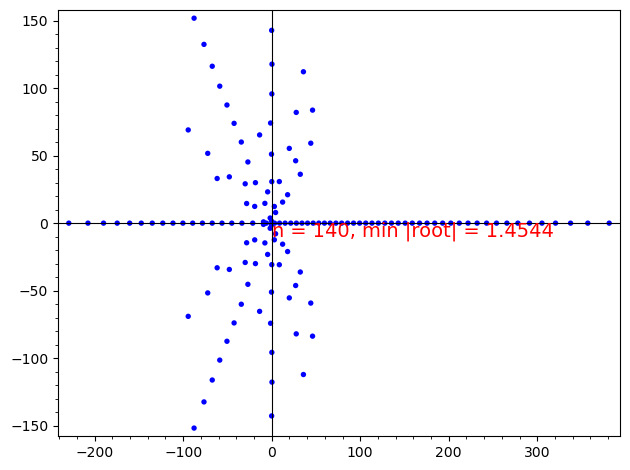

n=140, min modulus=1.4544490756437370382024329520, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n140_20250902_032730.png
n=141, min modulus=0.33203842501145209887783052106, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n141_20250902_032740.png
n=142, min modulus=0.67040246822001674936111204802, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n142_20250902_032750.png
n=143, min modulus=0.51030691244012180092153510161, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n143_20250902_032757.png
n=144, min modulus=1.9553494113527955790167411782, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n144_20250902_032807.png
n=145, min modulus=0.056953096452482822786922146680, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n145_20250902_032816.png
n=146, min modulus=1.1039358998334422846900472155, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n146_20250902_032826.png
n=147, min modulus=0.68129152

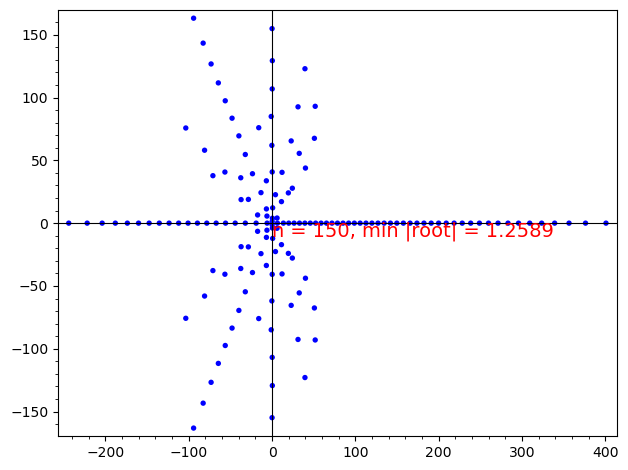

n=150, min modulus=1.2589134006326240927755985901, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n150_20250902_032917.png
n=151, min modulus=0.97911121872752809742498370139, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n151_20250902_032932.png
n=152, min modulus=0.65625591509110339242651107094, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n152_20250902_032944.png
n=153, min modulus=0.35326751782155175526469085128, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n153_20250902_032957.png
n=154, min modulus=0.54539870733137216348108589776, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n154_20250902_033010.png
n=155, min modulus=0.84266910245548364884397017093, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n155_20250902_033021.png
n=156, min modulus=2.2554839300409997656287622090, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n156_20250902_033031.png
n=157, min modulus=0.66688509

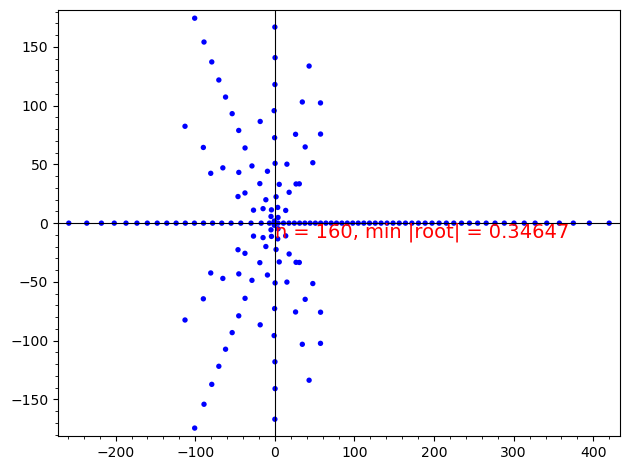

n=160, min modulus=0.34647475983996849029854178515, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n160_20250902_033119.png
n=161, min modulus=0.17213098924581841965192274567, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n161_20250902_033132.png
n=162, min modulus=1.1882172631731360029597257360, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n162_20250902_033147.png
n=163, min modulus=1.3751083643223359447079003086, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n163_20250902_033205.png
n=164, min modulus=0.98911225190462115817708071007, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n164_20250902_033219.png
n=165, min modulus=0.87586513617848609136828217885, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n165_20250902_033233.png
n=166, min modulus=2.3337091572945809463954398579, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n166_20250902_033251.png
n=167, min modulus=0.127246911

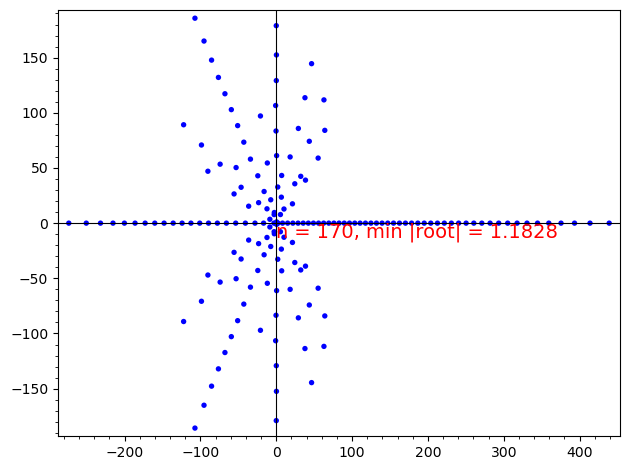

n=170, min modulus=1.1827952449690928582057533982, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n170_20250902_033345.png
n=171, min modulus=0.020949625158744226845059590200, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n171_20250902_033405.png
n=172, min modulus=1.2859384327704424129994777709, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n172_20250902_033426.png
n=173, min modulus=0.71942576745159718742212002420, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n173_20250902_033448.png
n=174, min modulus=0.43320875596060655150950915850, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n174_20250902_033509.png
n=175, min modulus=0.83187827291904992605813958547, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n175_20250902_033531.png
n=176, min modulus=1.7334547042126445896456499634, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n176_20250902_033547.png
n=177, min modulus=0.51851912

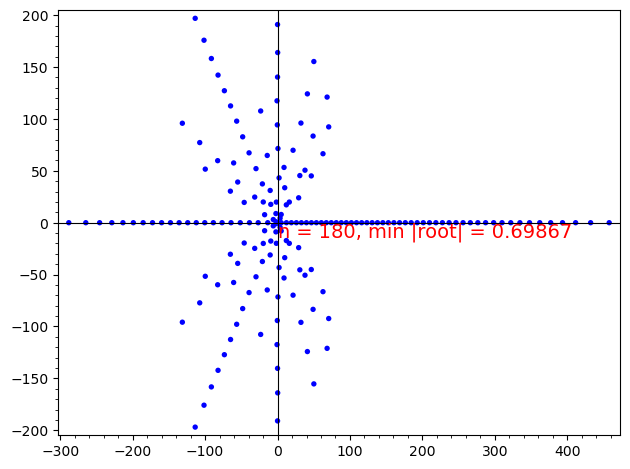

n=180, min modulus=0.69866630270320558389495469348, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n180_20250902_033653.png
n=181, min modulus=0.21668843237952084535844584611, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n181_20250902_033712.png
n=182, min modulus=1.8967823959511657911779243869, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n182_20250902_033733.png
n=183, min modulus=0.92596156798675080111322772070, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n183_20250902_033743.png
n=184, min modulus=0.44954361476323592145968990539, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n184_20250902_033752.png
n=185, min modulus=0.55190935349215421501332973562, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n185_20250902_033812.png
n=186, min modulus=2.0193669214439216974276023849, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n186_20250902_033837.png
n=187, min modulus=0.97975517

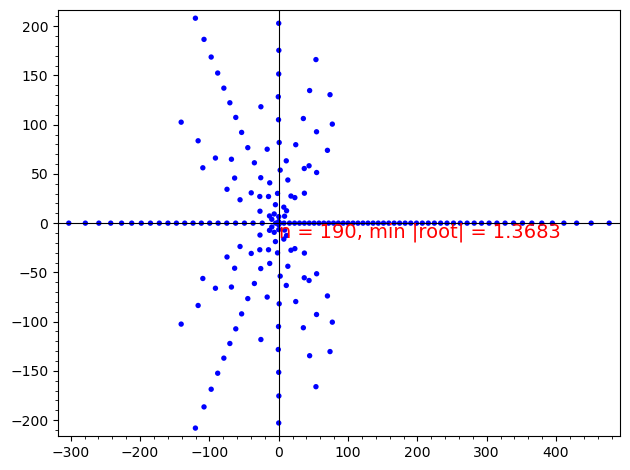

n=190, min modulus=1.3682651891970768061344832752, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n190_20250902_034024.png
n=191, min modulus=0.23299493643325482926040920881, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n191_20250902_034050.png
n=192, min modulus=2.0876159536758309165432828529, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n192_20250902_034117.png
n=193, min modulus=0.32161472737157379354967196606, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n193_20250902_034143.png
n=194, min modulus=0.27621854167465437099208925495, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n194_20250902_034210.png
n=195, min modulus=1.2813588906558162397984823193, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n195_20250902_034236.png
n=196, min modulus=1.3849629048246050384354520157, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n196_20250902_034304.png
n=197, min modulus=0.7047781127

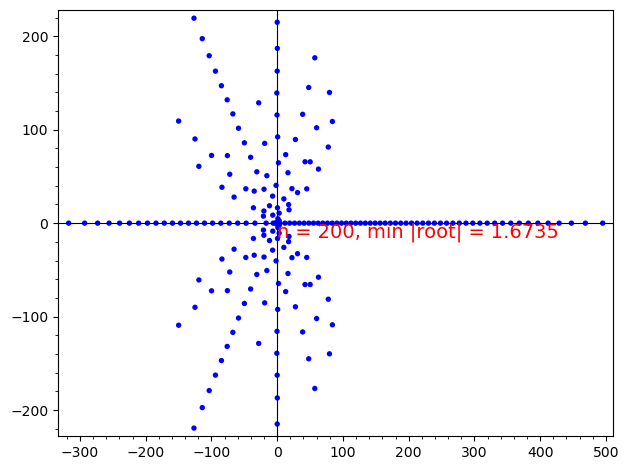

n=200, min modulus=1.6734952519752995354560557846, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n200_20250902_034459.png
n=201, min modulus=0.60987548156145490134198259238, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n201_20250902_034529.png
n=202, min modulus=1.1488781804771479934154084764, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n202_20250902_034608.png
n=203, min modulus=0.76963210939626934648611669861, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n203_20250902_034642.png
n=204, min modulus=0.49129917509929689372980807575, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n204_20250902_034702.png
n=205, min modulus=1.7954841134130723634803589830, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n205_20250902_034741.png
n=206, min modulus=0.36873966395009580047430996303, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n206_20250902_034815.png
n=207, min modulus=0.212472502

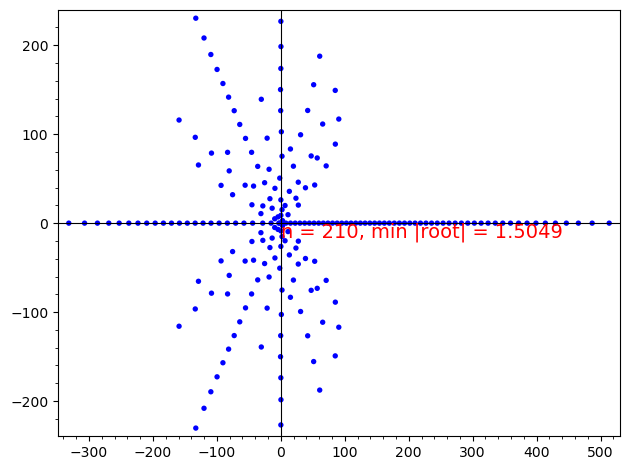

n=210, min modulus=1.5048945907414061513583691424, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n210_20250902_035040.png
n=211, min modulus=0.35670479305702718117624469432, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n211_20250902_035108.png
n=212, min modulus=0.57568061123340315677419822387, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n212_20250902_035140.png
n=213, min modulus=0.79829825436409197654194849209, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n213_20250902_035214.png
n=214, min modulus=0.037405303301925834064320576306, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n214_20250902_035246.png
n=215, min modulus=1.7820970940196452145759635540, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n215_20250902_035327.png
n=216, min modulus=0.14262891335973436168653914274, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n216_20250902_035402.png
n=217, min modulus=0.7589499

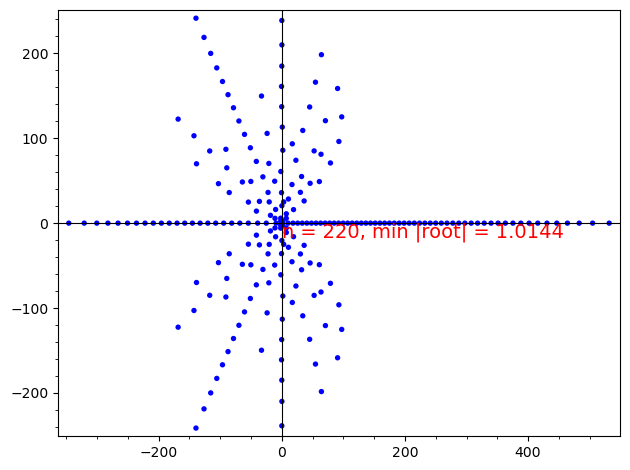

n=220, min modulus=1.0144444816217754996463742839, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n220_20250902_035654.png
n=221, min modulus=0.24687567426952013047971254859, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n221_20250902_035727.png
n=222, min modulus=1.6778340430940629493770329894, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n222_20250902_035808.png
n=223, min modulus=0.45511672612949677683277869253, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n223_20250902_035847.png
n=224, min modulus=0.91257823054047119778069796613, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n224_20250902_035931.png
n=225, min modulus=0.85968860171728267301311577888, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n225_20250902_040014.png
n=226, min modulus=0.47183080680916746101384464400, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n226_20250902_040058.png
n=227, min modulus=1.59533762

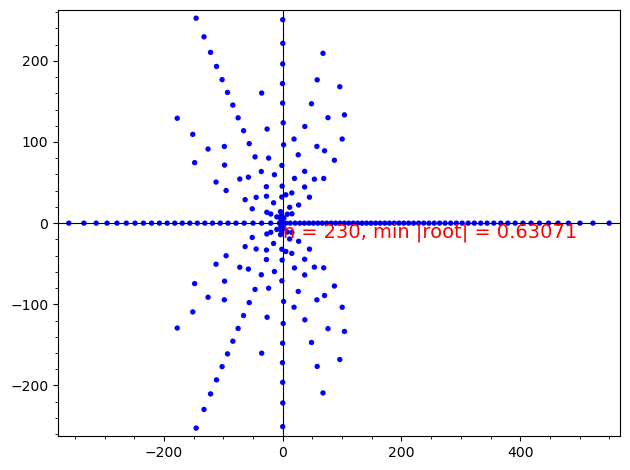

n=230, min modulus=0.63071444849135046417212323924, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n230_20250902_040355.png
n=231, min modulus=1.3728669708689741381746747227, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n231_20250902_040412.png
n=232, min modulus=1.7613827075724122971203921143, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n232_20250902_040448.png
n=233, min modulus=0.087347403023851505226921782691, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n233_20250902_040520.png
n=234, min modulus=1.1599551170472361983598694449, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n234_20250902_040555.png
n=235, min modulus=0.62536069020609460046647877776, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n235_20250902_040631.png
n=236, min modulus=1.1572322747096357916097044816, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n236_20250902_040658.png
n=237, min modulus=0.258505148

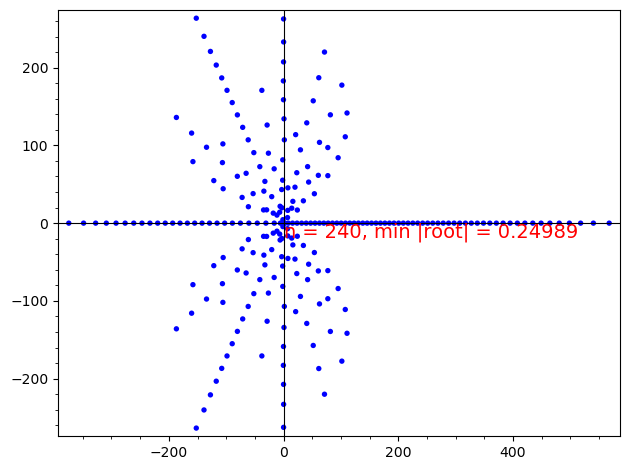

n=240, min modulus=0.24988800228766044400803813118, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n240_20250902_040934.png
n=241, min modulus=0.045772317759338360006040568289, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n241_20250902_041016.png
n=242, min modulus=2.4400216762447009548349323073, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n242_20250902_041103.png
n=243, min modulus=0.76559986672521897207415574578, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n243_20250902_041148.png
n=244, min modulus=0.58027145932847006054921255998, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n244_20250902_041232.png
n=245, min modulus=0.28397188991822450204657257384, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n245_20250902_041322.png
n=246, min modulus=1.1225701391848046728083428219, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n246_20250902_041414.png
n=247, min modulus=0.7425203

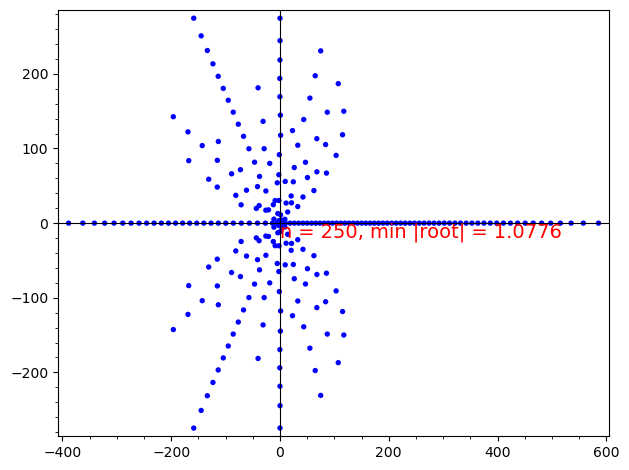

n=250, min modulus=1.0776014550855613585314884766, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n250_20250902_041727.png
n=251, min modulus=0.20289912204239467160739404368, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n251_20250902_041807.png
n=252, min modulus=1.1398408682738697834581587387, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n252_20250902_041909.png
n=253, min modulus=0.55571051985327794823333776852, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n253_20250902_042003.png
n=254, min modulus=0.81149698212913525122815561923, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n254_20250902_042042.png
n=255, min modulus=1.6859233765388759979382779430, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n255_20250902_042132.png
n=256, min modulus=1.4807556382805569784759125503, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n256_20250902_042226.png
n=257, min modulus=0.0043173667

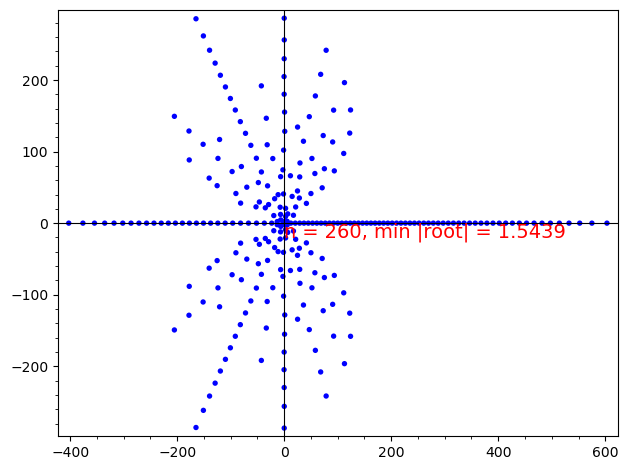

n=260, min modulus=1.5438938063419231944722614989, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n260_20250902_042630.png
n=261, min modulus=0.95245705444231158892022371263, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n261_20250902_042737.png
n=262, min modulus=1.6593536037766930992608231916, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n262_20250902_042837.png
n=263, min modulus=0.40976955054039358685176540837, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n263_20250902_042938.png
n=264, min modulus=0.72753732163821209175092126197, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n264_20250902_043049.png
n=265, min modulus=0.71732205138848503028442579753, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n265_20250902_043201.png
n=266, min modulus=1.4710772899909316735454402676, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n266_20250902_043311.png
n=267, min modulus=2.307630765

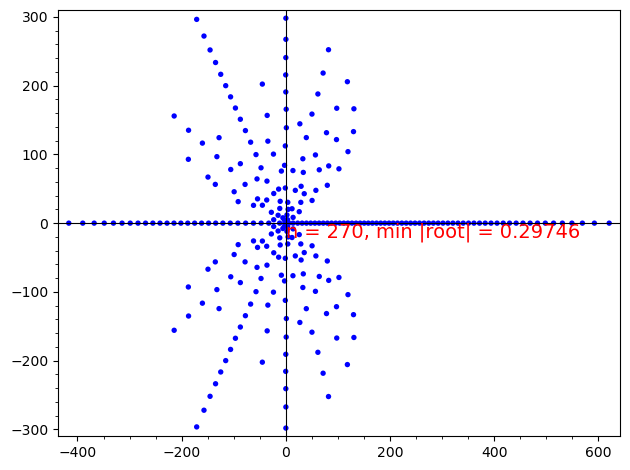

n=270, min modulus=0.29746424955981930376068298486, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n270_20250902_043718.png
n=271, min modulus=1.0505287345582054650450205102, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n271_20250902_043833.png
n=272, min modulus=0.33636998653619800584466227223, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n272_20250902_043929.png
n=273, min modulus=1.2940082499200622367427152272, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n273_20250902_044030.png
n=274, min modulus=2.0719283555360905219847216537, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n274_20250902_044126.png
n=275, min modulus=0.45647488149286183346789560014, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n275_20250902_044237.png
n=276, min modulus=1.4021556736760506594357204215, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n276_20250902_044315.png
n=277, min modulus=0.9308352430

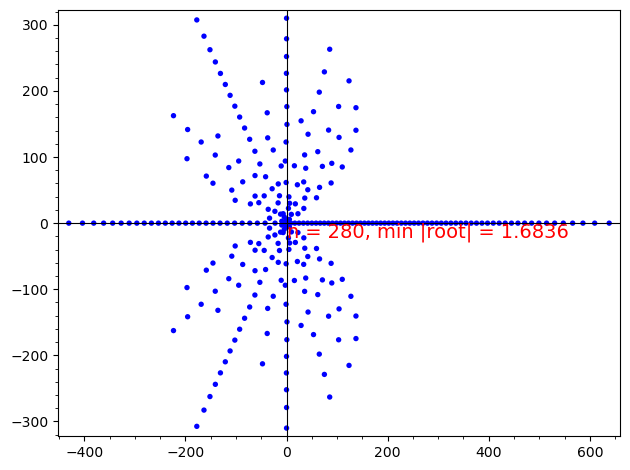

n=280, min modulus=1.6836221129504669775593778127, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n280_20250902_044838.png
n=281, min modulus=0.88923197284310851535702673276, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n281_20250902_045015.png
n=282, min modulus=1.3497982803581440184822815217, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n282_20250902_045146.png
n=283, min modulus=1.2506264542322734766165097957, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n283_20250902_045331.png
n=284, min modulus=1.6437738691440761617289637406, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n284_20250902_045446.png
n=285, min modulus=0.44198989393173211071089668295, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n285_20250902_045609.png
n=286, min modulus=0.50733482966433668693767142579, saved /Users/barrybrent/data/root_plots_20250902_032220/roots_n286_20250902_045740.png
n=287, min modulus=1.8157313789

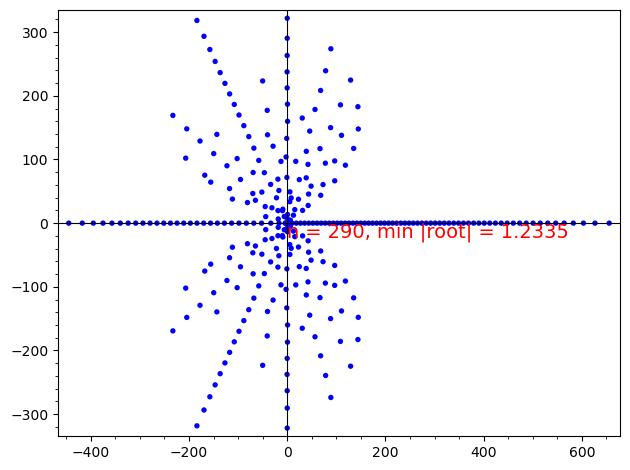

In [ ]:
import pickle
from sage.all import list_plot, ComplexField, text, Graphics
from datetime import datetime
from pathlib import Path
import sys

# -----------------------------------
# Function: scatter plot roots of poly
# -----------------------------------
def plot_roots(cp, n=None, min_mod=None, precision=53, size=20):
    CF = ComplexField(precision)
    roots = [CF(r) for r in cp.roots(CF, multiplicities=False)]
    points = [(z.real(), z.imag()) for z in roots]
    
    p = list_plot(points, plotjoined=False, marker='o', size=size)
    p.axes_labels(['Re', 'Im'])
    
    # Add title text if available
    title_text = ""
    if n is not None:
        title_text += f"n = {n}"
    if min_mod is not None:
        title_text += f", min |root| = {min_mod:.5g}"
    if title_text:
        p += text(title_text, (0.05, 0.95), fontsize=14, color='red',
                  horizontal_alignment='left', vertical_alignment='top', frame=True)
    return p

# ------------------------------------------------------
# Function: compute minimum modulus of polynomial roots
# ------------------------------------------------------
def min_modulus(cp, precision=53):
    CF = ComplexField(precision)
    roots = [CF(r) for r in cp.roots(CF, multiplicities=False)]
    if roots:
        return min([abs(r) for r in roots])
    else:
        return None
lower_bound=1
upper_bound=301
# -------------------------
# Paths and timestamped folder
# -------------------------
base_dir = Path('/Users/barrybrent/data')
timestamp_folder = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_dir = base_dir / f'root_plots_{timestamp_folder}'
plot_dir.mkdir(parents=True, exist_ok=True)

# -------------------------
# Load your pre-made characteristic polynomials list
# Example format: [(1, cp1), (2, cp2), ..., (n, cpn)]
# -------------------------
with open('/Users/barrybrent/data/run27aug25no1.txt', 'rb') as rfile:
    tau_lst = pickle.load(rfile)

def tau(n):
    return ZZ(tau_lst[n][1])

# ------------------ Build characteristic polynomials ------------------
Rx.<x> = QQ[]
cp_list = []
for n in range(lower_bound, upper_bound):
    lst = [factorial(n) * tau(n-k+1) * x^k / factorial(k) for k in range(0, n+1)]
    poly = Rx(sum(lst))
    cp_list.append((n, poly))


min_mod_list = []
displayed_plots = []

# -------------------------
# Loop over polynomials
# -------------------------
for n, cp in cp_list:
    # Minimum modulus
    min_mod = min_modulus(cp, precision=100)
    min_mod_list.append((n, float(min_mod)))
    
    # Scatter plot
    p = plot_roots(cp, n=n, min_mod=min_mod, precision=100, size=15)
    
    # Timestamped filename
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    plot_filename = plot_dir / f'roots_n{n}_{timestamp}.png'
    p.save(plot_filename)
    
    # Display only n divisible by 50
    if n % 10 == 0:
        old_stdout = sys.stdout
        sys.stdout = open('/dev/null','w')  # suppress warnings
        p.show()
        sys.stdout.close()
        sys.stdout = old_stdout
        displayed_plots.append(p)
    
    print(f'n={n}, min modulus={min_mod}, saved {plot_filename}')

# -------------------------
# Save minimum moduli list
# -------------------------
with open(plot_dir / 'min_modulus.txt', 'wb') as wfile:
    pickle.dump(min_mod_list, wfile)

# -------------------------
# Create a single min modulus plot
# -------------------------
n_values = [item[0] for item in min_mod_list]
mods = [item[1] for item in min_mod_list]
p_min = list_plot(list(zip(n_values, mods)), plotjoined=True, marker='o', size=5)
p_min.axes_labels(['n', 'min modulus'])
p_min += text("Minimum root modulus vs n", (0.05, 0.95), fontsize=14, color='blue',
              horizontal_alignment='left', vertical_alignment='top', frame=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
p_min_file = plot_dir / f'min_modulus_plot_{timestamp}.png'
p_min.save(p_min_file)
p_min.show()

# -------------------------
# Optional: save displayed plots as single PDF
# -------------------------
if displayed_plots:
    pdf_file = plot_dir / f'displayed_root_plots_{timestamp}.pdf'
    g = Graphics()
    for plot in displayed_plots:
        g += plot
    g.save(pdf_file)
    print(f"Displayed plots saved as PDF: {pdf_file}")
